In [339]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch, Rectangle
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["mathtext.fontset"] = "dejavuserif"

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#
def first_return_map(params, recalculate=True, recompile=True):
    script = "first_return_map"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
    #
    # image
    v_, p_, t_return, zero_count = my.get_binary(filename_bin).copy()
    # print(*zip(v_,p_))
    # v_ = np.where(p_ == 0, np.nan, v_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    diff_ = np.abs(np.diff(p_, prepend=p_[0]))
    discontinuities = (diff_ > 10*np.mean(diff_)) 
    p0 = np.where(discontinuities, np.nan, p_)
    t0 = np.where(discontinuities, np.nan, t_return)
    z0 = np.where(discontinuities, np.nan, zero_count)
    # print(np.max(t_return))
    # print(np.max(zero_count))
    t_return = np.where(t_return == 0, np.nan, t_return)
    fig, ax = plt.subplots()
    #
    ax.plot(v_, p_, c='b', lw=1, linestyle=':')
    ax.plot(v_, p0, c='b', lw=2)
    ax.scatter(v_, p0, marker='|', c='k', s=2)
    ax.plot(v_, v_*0, c='k')
    ax.plot(v_, v_,   c='k')
    ax.set_ylabel('$|p|$', color='b', rotation=0)
    ax.tick_params(axis='y', labelcolor='b')
    ax.dataLim.y1 = np.nanmax(p_)*1.05
    # ax.dataLim.y1 = 2 
    #
    ax_t = ax.twinx()
    ax_t.plot(v_, t_return, c='r', lw=1, linestyle=':')
    ax_t.plot(v_, t0, c='r', lw=2)
    ax_t.set_ylabel('t_0', color='r', rotation=0)
    ax_t.tick_params(axis='y', labelcolor='r')
    ax_t.dataLim.y0 = 0 
    #
    ax_z = ax.twinx()
    ax_z.plot(v_, z0, c='orange')
    ax_z.plot(v_, zero_count, c='orange', lw=1, linestyle=':')
    ax_z.set_ylabel('zero count', color='orange')
    ax_z.tick_params(axis='y', labelcolor='orange')
    ax_z.spines.right.set_position(("axes", 1.15))
    ax_z.dataLim.y0 = 0 
    ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")
    # plt.clf()

def single_solution(params, recalculate=True, recompile=True, scatter=True):
    script = "single_solution"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
        
        
    #
    # just solution
    x_, dx_, t_ = my.get_binary(filename_bin)
    # plt.clf()
    plt.plot(t_, x_)
    plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")

    # # parametric
    # x_, dx_, t_ = my.get_binary(f"output_bin/{filename}.bin")
    # plt.clf()
    # plt.plot(x_, dx_)
    # plt.savefig(f"output_img/{filename} (phase space projection).jpg", format="jpg", dpi=1000)
    # # os.system(f"kitten icat 'output_img/{filename}.jpg'")


In [455]:
recalculate = recompile = True


In [488]:

recalculate = recompile = False

In [ ]:
# params = dict(
#         comment="chaotic region",
#         size = 100,
#         mode = "reim", 
#         x_l = 0, x_r = 0.5,
#         y_l = 0, y_r = 3.,
#         d = 1, tau = 1,
#         v_l = 0.01, v_r = 10, v_n = 10000,
#         T = 30, h = 0.01,
)

# params = dict(
#         comment="chaotic region zoom",
#         size = 200,
#         mode = "reim", 
#         x_l = 0, x_r = 0.2,
#         y_l = 1, y_r = 2.,
#         d = 1, tau = 1,
#         v_l = 0.0001, v_r = 10, v_n = 20000,
#         T = 400, h = 0.01,
#         expspace=True,
# )

# params = dict(
#         comment="chaotic region zoom",
#         size = 200,
#         mode = "reim", 
#         x_l = 0, x_r = 0.2,
#         y_l = 1, y_r = 2.,
#         d = 1, tau = 1,
#         v_l = 0.0001, v_r = 10, v_n = 100000,
#         T = 10000, h = 0.01,
#         expspace=True,
# )

In [419]:
# params = dict(
#         size = 1000,
#         mode = "l1l2", 
#         x_l = -5, x_r = 5,
#         y_l = -5, y_r = 5,
#         d = -1, tau = 1,
#         v_l = 0.01, v_r = 10, v_n = 300,
#         T = 15, h = 0.03,
#         comment="re d-",
# )

# params = dict(
#         size = 50,
#         mode = "l1l2", 
#         x_l = -2, x_r = 2,
#         y_l = -2, y_r = 2,
#         d = 1, tau = 1,
#         v_l = 0.01, v_r = 5, v_n = 100,
#         T = 7, h = 0.1,
#         comment="re d+",
# )



In [430]:

# params = dict(
#         size = 200,
#         mode = "l1l2", 
#         x_l = -5, x_r = 5,
#         y_l = -5, y_r = 5,
#         d = -1, tau = 1,
#         v_l = 0.01, v_r = 4, v_n = 1000,
#         T = 3, h = 0.01,
#         # expspace=True,
# )






In [ ]:
params = dict(
        comment="chaotic region zoom",
        size = 50,
        mode = "reim", 
        x_l = 0, x_r = 0.2,
        y_l = 1, y_r = 2.,
        d = 1, tau = 1,
        v_l = 0.0001, v_r = 10, v_n = 10000,
        T = 1000, h = 0.005,
        expspace=True,
)

In [303]:
# params = dict(
#         size = 100,
#         mode = "l1l2", 
#         x_l = -5, x_r = 5,
#         y_l = -5, y_r = 5,
#         d = 1, tau = 1,
#         v_l = 0.01, v_r = 10, v_n = 500,
#         T = 25, h = 0.01,
# )

In [441]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = -4, x_r = 4,
        y_l = 0, y_r = 30,
        d = -1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 6, h = 0.03,
        expspace=True,
)

In [490]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = -1, x_r = 1,
        y_l = 4, y_r = 7,
        d = -1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 6, h = 0.01,
        expspace=True,
)

In [492]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = 0.25, x_r = 0.7,
        y_l = 4.5, y_r = 5,
        d = -1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 6, h = 0.01,
        expspace=True,
)

In [471]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = -4, x_r = 4,
        y_l = 0, y_r = 30,
        d = 1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 6, h = 0.03,
        expspace=True,
)

In [482]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = 0.1, x_r = 1.5,
        y_l = 0, y_r = 3.5,
        d = 1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 1000, h = 0.03,
        expspace=True,
)

In [486]:
params = dict(
        size = 500,
        mode = "reim", 
        x_l = 0., x_r = .5,
        y_l = 1.6, y_r = 2.5,
        d = 1, tau = 1,
        v_l = 0.01, v_r = 4, v_n = 1001,
        T = 1000, h = 0.03,
        expspace=True,
)

~~~ cpp/fixed_points_count.cpp is executed ~~~
~~~  parameters: {"size": 500, "mode": "reim", "x_l": 0.25, "x_r": 0.7, "y_l": 4.5, "y_r": 5, "d": -1, "tau": 1, "v_l": 0.01, "v_r": 4, "v_n": 1001, "T": 6, "h": 0.01, "expspace": true} ~~~
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ 0:12:55 / 0:12:55                                                   :51                                              / 0:12:49                                                                                                              :12:50                                          16 / 0:12:50                                         50                                                                   12:51                                         :5 / 0:12:51                                                                           :11:55 / 0:12:52                                         :11:55 / 0:12:52                                          0:11:55 

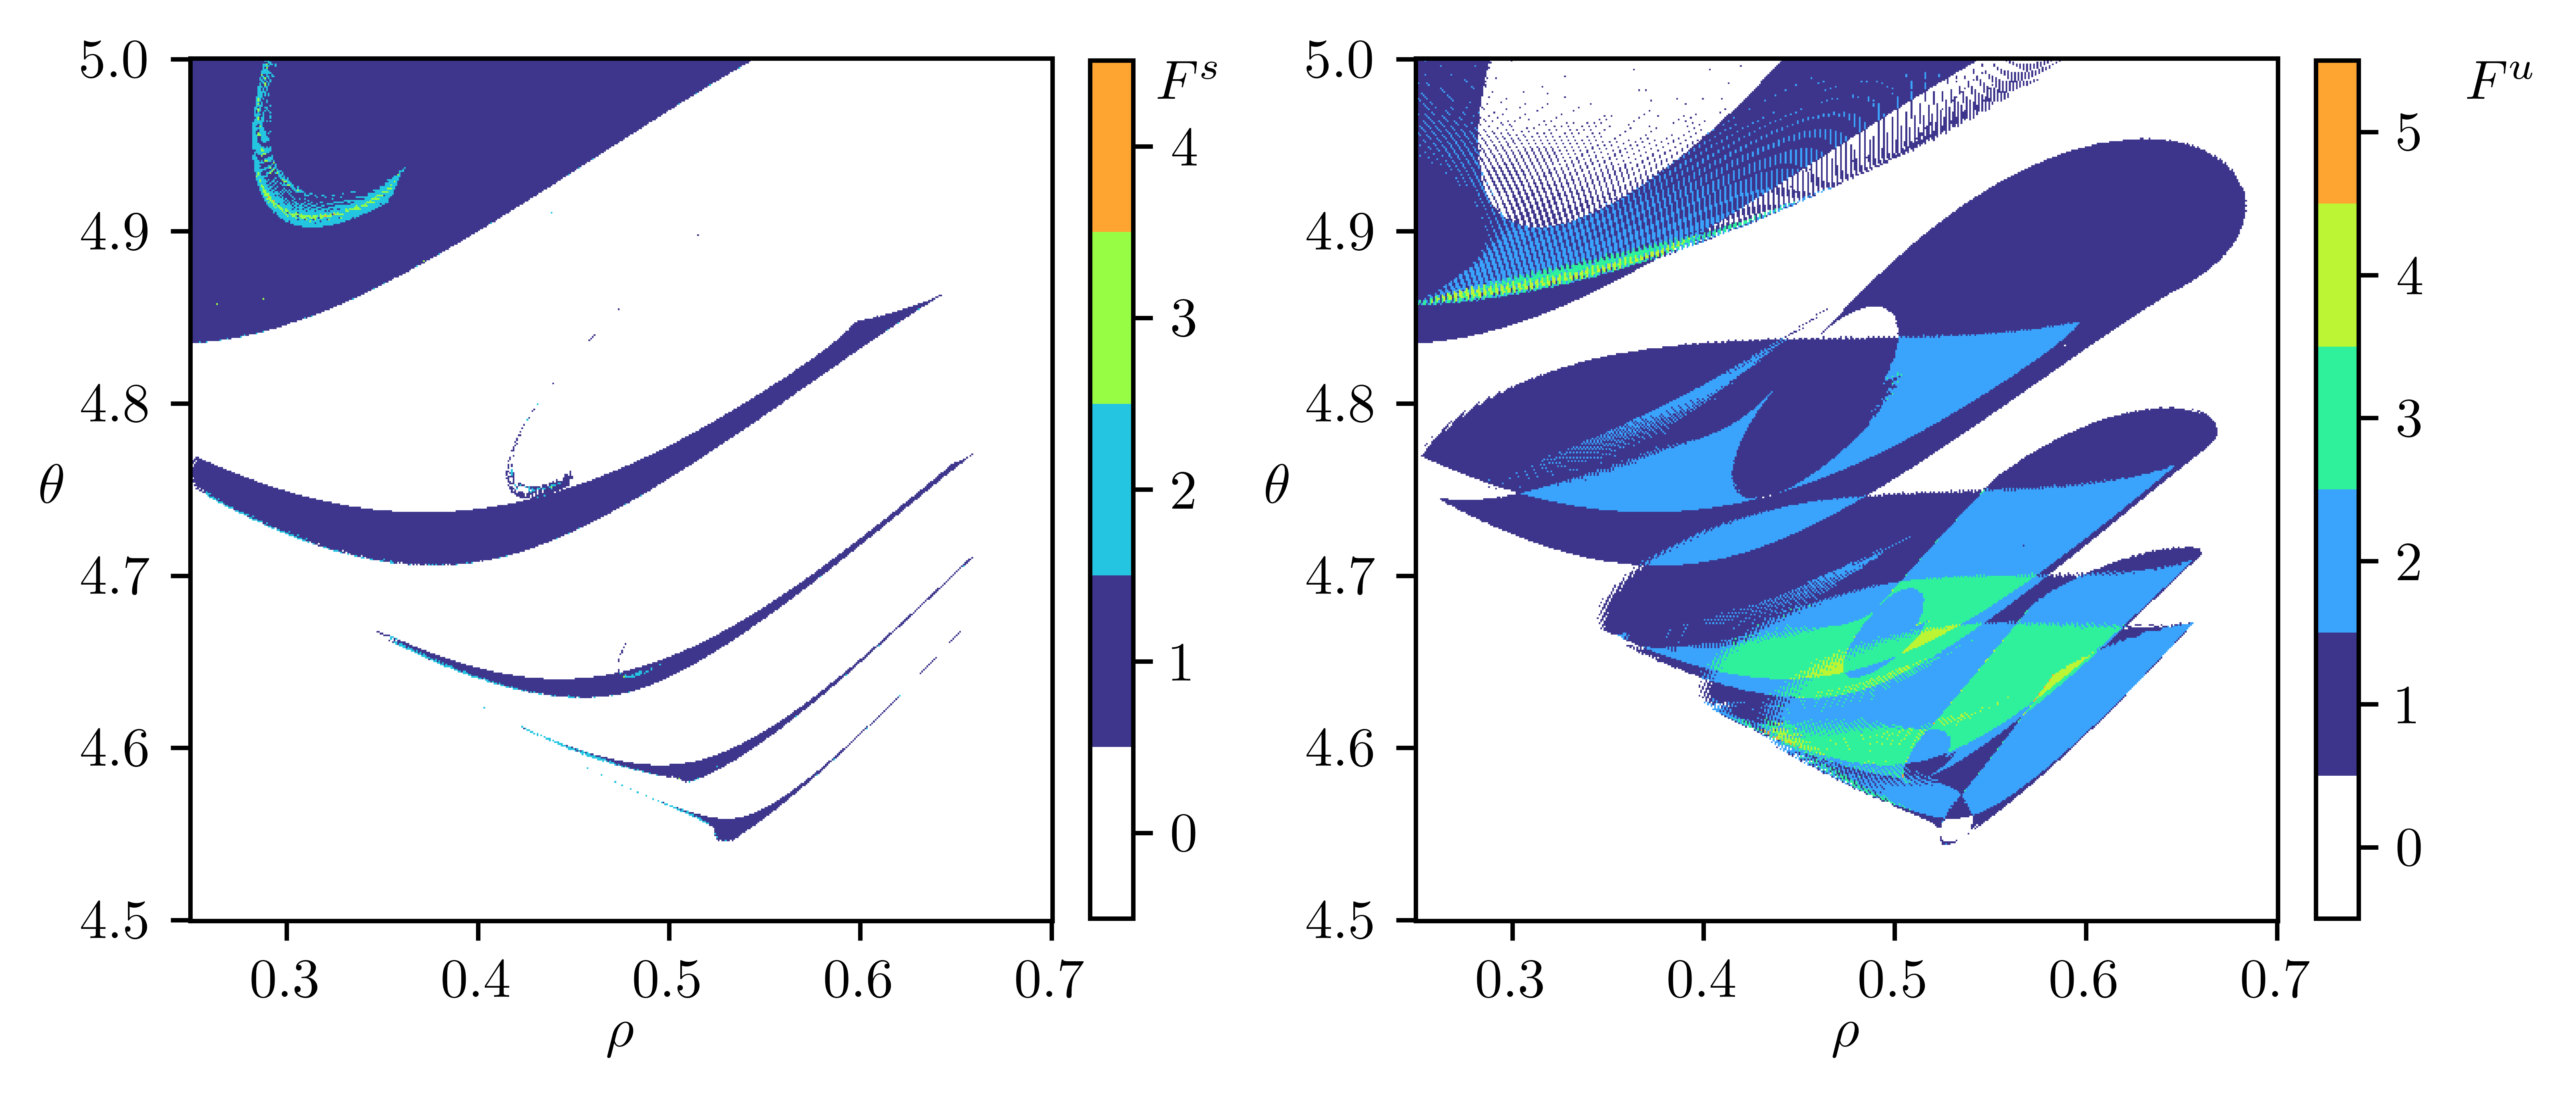

In [493]:



def make_colormap(vmax, cmin, cmax):
    cmap = plt.cm.turbo(np.linspace(cmin, cmax, vmax))
    # combine them and build a new colormap
    cmap = np.vstack((np.array([(1,1,1,1)]), cmap))
    return colors.LinearSegmentedColormap.from_list('my_colormap', cmap)



script = "fixed_points_count"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# data
count_stable, count_unstable = my.get_binary(f"output_bin/{filename}.bin").copy()
xs = np.linspace(params["x_l"], params["x_r"], params["size"])
ys = np.linspace(params["y_l"], params["y_r"], params["size"])
# figure
fig, ax = plt.subplots(1,2, figsize=(7,3), dpi=1000)
plt.subplots_adjust(wspace=0.3)
vmax1 = max(1,np.max(count_stable))
vmax2 = max(1,np.max(count_unstable))
ticks1 = np.arange(vmax1+1)
ticks2 = np.arange(vmax2+1)
cbar_stepsizes = np.flip(np.array([1,2,5,10,20,25,50,100,200,250,500,1000]))
for ss in cbar_stepsizes:
    if len(ticks1)//ss > 10:
        ticks1 = ticks1[0::ss]
        break
for ss in cbar_stepsizes:
    if len(ticks2)//ss > 10:
        ticks2 = ticks2[0::ss]
        break
        
if params["mode"] == "l1l2":
    for i in range(2):
        ax[i].set_xlabel('$\lambda_1$', rotation=0, labelpad=0,ha='center')
        ax[i].set_ylabel('$\lambda_2$', rotation=0, labelpad=0,va='center')
elif params["mode"] == "reim":
     for i in range(2):
        ax[i].set_xlabel('$\\rho$', rotation=0, labelpad=0,ha='center')
        ax[i].set_ylabel('$\\theta$', rotation=0, labelpad=5,va='center')
# ax_p.tick_params(axis='y', labelcolor='b')


# cmap = 'inferno'
# cmap = plt.get_cmap('turbo', vmax)
im0 = ax[0].pcolormesh(xs, ys, count_stable, cmap=make_colormap(vmax1,0.05,.7), vmin=0,vmax=vmax1)

im1 = ax[1].pcolormesh(xs, ys, count_unstable, cmap=make_colormap(vmax2,0.05,.7),vmin=0,vmax=vmax2)



cbar0 = plt.colorbar(im0,ax=ax[0],
             ticks=ticks1,
             boundaries=np.arange(vmax1+2)-0.5,
            fraction=0.0455, pad=0.04)
cbar1 = plt.colorbar(im1,ax=ax[1],
             ticks=ticks2,
             boundaries=np.arange(vmax2+2)-0.5,
            fraction=0.0455, pad=0.04)


cbar0.set_label('$F^s$',rotation=0,va='top',loc='top')
cbar1.set_label('$F^u$',rotation=0,va='top',loc='top',labelpad=20)


ax[0].set_aspect((params["x_r"]-params["x_l"])/((params["y_r"]-params["y_l"])))
ax[1].set_aspect((params["x_r"]-params["x_l"])/((params["y_r"]-params["y_l"])))

# saving
fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# fig.savefig(f"output_img/{filename}.svg", format="svg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# os.system(f"kitten icat 'output_img/{filename}.jpg'")



~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"b": 0.25, "c": -0.125, "d": -1, "v": 0.05, "tau": 1, "h": 0.01, "T": 50, "v_n": 1000, "v_l": 0.001, "v_r": 10} ~~~
`````@3````@8`````@1````@6`````@`````@3````@8`````@1````@6`````@`````@3````@8`````@1````@6`````@```@ 0:0:0 / 0:0:0                                         ~~~ Computation took 0:0:59 (hh:mm:ss) ~~~


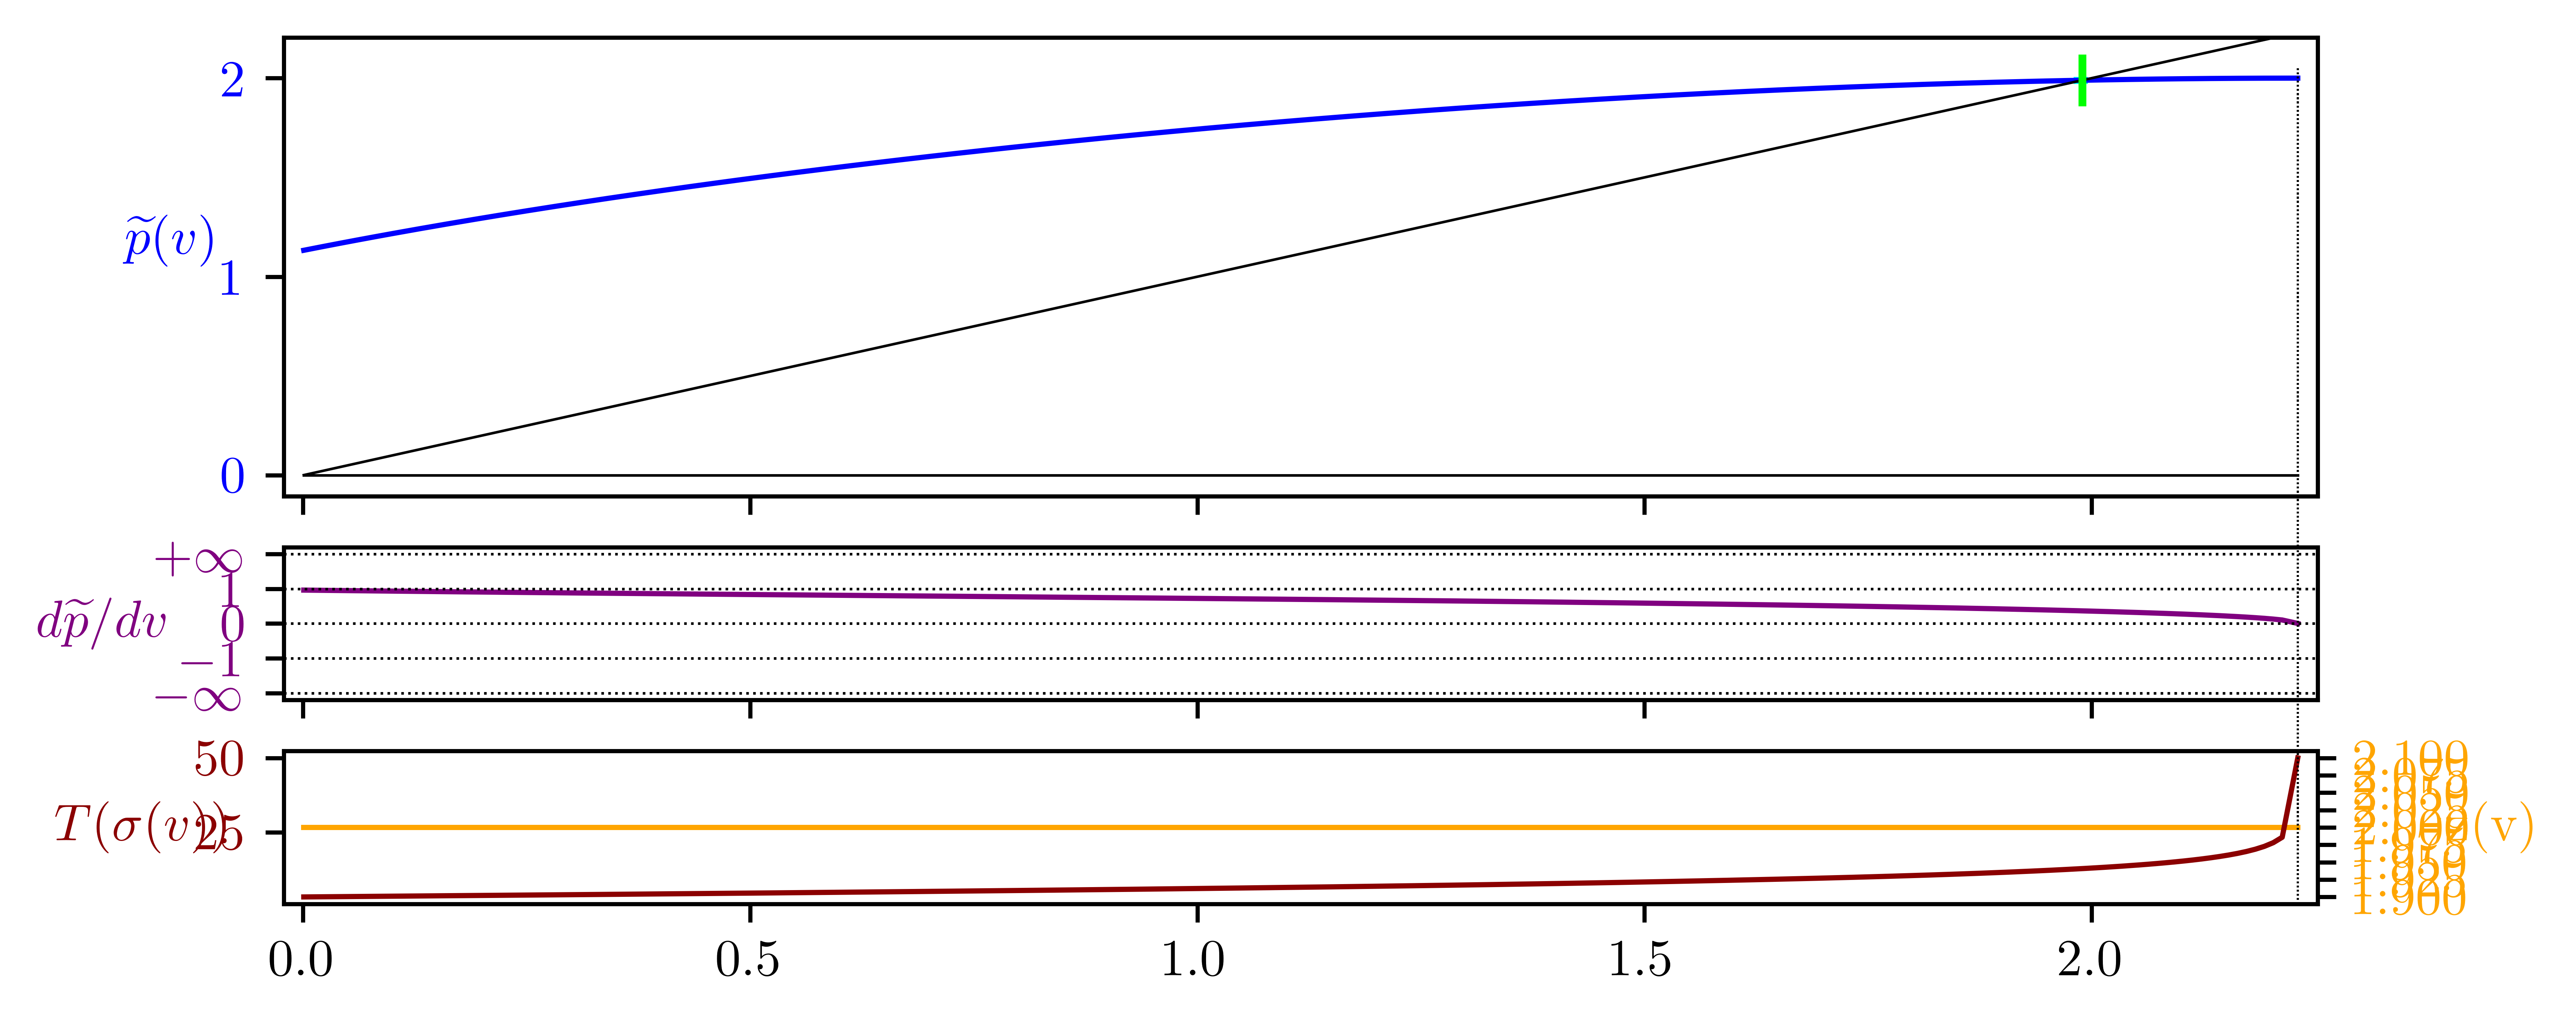

In [499]:
# l1=1
# l2=1.1
# params.update(
#         b = -(l1+l2),
#         c = l1*l2,
#         v_n = 5000,
#     v_l = 0.001,
#         v_r = 10,
#     h = 0.01
# )


# re=-0.5
# im=5.4
# params = dict(
#         b = -2 * re,
#         c = re*re + im*im,
#         d = -1,
#         tau = 1,
#         v_n = 10000,
#         v_l = 0.001,
#         v_r = 0.7,
#         T = 10,
#         h = 0.01,
# )


params = dict(
 b = 0.25,
 c = -0.125, d = -1, v = 0.05, tau = 1,
    h=0.01, T = 50,
    v_n = 1000,
        v_l = 0.001,
        v_r = 10,
)

# re=0.05
# im=1.6
# # im=1.3
# params = dict(
#         b = -2 * re,
#         c = re*re + im*im,
#         d = 1,
#         tau = 1,
#         v_n = 10000,
#         v_l = 0.001,
#         v_r = 0.75,
#         T = 1000,
#         h = 0.001,
# )


# re=0.2
# im=1.4
# # im=1.3
# params = dict(
#         b = -2 * re,
#         c = re*re + im*im,
#         d = 1,
#         tau = 1,
#         v_n = 1000,
#         v_l = 0.001,
#         v_r = 1.5,
#         T = 1000,
#         h = 0.001,
# )

script = "first_return_map"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)
#
# image
v_, p_, dp_, t_return, zero_count = my.get_binary(filename_bin).copy()
v_stable = my.get_binary(f"output_bin/{filename}.stable_fixed_points.bin")
v_unstable = my.get_binary(f"output_bin/{filename}.unstable_fixed_points.bin")
disco_index = my.get_binary(f"output_bin/{filename}.disco_index.bin")
intervals_l, intervals_r = my.get_binary(f"output_bin/{filename}.invariant_interval.bin")
disco_index = np.insert(disco_index,(0, disco_index.shape[0]),(0,len(v_)))

# print(*zip(intervals_l, intervals_r))

# print(*zip(v_,p_))
# v_ = np.where(p_ == 0, np.nan, v_)
# p_ = np.where(p_ == 0, np.nan, p_)
# p_ = np.where(p_ == 0, np.nan, p_)
# print(np.max(t_return))
# print(np.max(zero_count))
# t_return = np.where(t_return == 0, np.nan, t_return)
fig, (ax_p, ax_dp, ax_t) = plt.subplots(3,1, sharex=True, figsize=(7,3),height_ratios=[3, 1, 1],dpi=1000)
# plt.tight_layout()

def smooth(x):
    return 2/np.pi*np.arctan(x/np.abs(x)**(0.5))

# ax_t.dataLim.y0 = 0 
# #
ax_z = ax_t.twinx()
ax_t.set_zorder(1)  # default zorder is 0 for ax1 and ax2
ax_t.set_frame_on(False)

ax_z.set_ylabel('z(v)', color='orange',rotation=0,va='center')
ax_z.tick_params(axis='y', labelcolor='orange')
# ax_z.spines.right.set_position(("axes", 1.15))
# ax_z.dataLim.y0 = 0 
ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))


lw_solid = 1
lw_dot = 0.5
for i in range(1, len(disco_index)):
    ii = slice(disco_index[i-1]-1, disco_index[i-1]+2)
    iii = slice(disco_index[i-1],disco_index[i])
    ax_p.plot(v_[iii], p_[iii], c='b', lw=lw_solid)
    ax_p.plot(v_[ii],p_[ii], c='b', linestyle=':', lw=lw_dot)
    
    ax_dp.plot(v_[iii], smooth(dp_[iii]), c='purple', lw=lw_solid)
    ax_dp.plot(v_[ii],  smooth(dp_[ii]),  c='purple', linestyle=':', lw=lw_dot)
    
    
    ax_z.plot(v_[iii], zero_count[iii], c='orange', lw=lw_solid,zorder=0)
    ax_z.plot(v_[ii], zero_count[ii], c='orange', lw=lw_dot, linestyle=':')
    
    ax_t.plot(v_[iii], t_return[iii], c='darkred', lw=lw_solid,zorder=1)
    ax_t.plot(v_[ii], t_return[ii], c='darkred', lw=lw_dot, linestyle=':')
    
    
    
ax_p.plot(v_, v_*0, c='k',lw=0.5)
ax_p.plot(v_, v_,   c='k',lw=0.5)
# ax_p.set_aspect('equal')
ax_p.set_ylabel('$\widetilde{p}(v)$', color='b', rotation=0, labelpad=10)
ax_p.tick_params(axis='y', labelcolor='b')

ax_p.dataLim.y1 = min(np.nanmax(p_)*1.05, np.nanmax(v_)*2)


ax_p.scatter(v_stable,   v_stable,   s=100, marker='|', c='#00FF00', zorder=1000)
ax_p.scatter(v_unstable, v_unstable, s=5, marker='o', c='r', zorder=1000)
ax_p.scatter(v_unstable, v_unstable, s=2, marker='o', c='w', zorder=1000)

for i in range(len(intervals_l)):
    l = intervals_l[i]
    w = intervals_r[i] - intervals_l[i]
    ax_p.add_patch(Rectangle((l,l), w, w,fill=False, color='cyan'))
    
    


dp_yticks = [-1,smooth(-1),0,smooth(1),1]
for tick in dp_yticks:
    ax_dp.axhline(tick,linestyle=':',c='k',lw=0.5)
ax_dp.set_yticks(dp_yticks, labels=["$-\infty$", "$-1$", 0, 1, "$+\infty$"])
ax_dp.tick_params(axis='y', labelcolor='purple')
ax_dp.set_ylabel('$d\widetilde{p}/dv$', color='purple', rotation=0, labelpad=10, va='center')
#
# ax_dp = ax.twinx()
# ax_dp.plot(v_, np.arctan(dp_2), c='orange', lw=2)

# ax_dp.spines.right.set_position(("axes", 1.25))

ax_t.set_ylabel('$T(\sigma(v))$', color='darkred', rotation=0, labelpad=10,va='center')
ax_t.tick_params(axis='y', labelcolor='darkred')


for i in range(1,len(disco_index)-1):
    x = v_[disco_index[i]]
    ax_p.axvline(x=x,ymin=-.2,ymax=max(p_[disco_index[i]],p_[disco_index[i]-1])/ax_p.dataLim.y1*0.98,c="black",linewidth=0.3, linestyle=':',zorder=100, clip_on=False)
    ax_dp.axvline(x=x,ymin=-1.2,ymax=1,c="black",linewidth=0.3, linestyle=':',zorder=100, clip_on=False)
    ax_t.axvline(x=x,ymin=0,ymax=1,c="black",linewidth=0.3, linestyle=':',zorder=100, clip_on=False)

ax_p.set_xmargin(0.01)

fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# os.system(f"kitten icat 'output_img/{filename}.jpg'")
# plt.clf()

2.3

In [ ]:
params.update(
    v = .3,
    T= 600,
)

script = "single_solution"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]

filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

#
# just solution
x_, dx_, t_ = my.get_binary(filename_bin)
# plt.clf()
# plt.plot(t_, x_)
plt.plot(x_,dx_)
plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)

In [ ]:
re=-0.2
im=6
params.update(
        b = -2 * re,
        c = re*re + im*im,
        v_n = 5000,
        expspace=True
)
first_return_map(params, recalculate=recalculate, recompile=recompile)

params = dict(
    # b = -0.2, c = 1, d = 1, tau = 1, 
    v = 1,
    # T = 50, h = 0.01, comment = "lorenz attractor"
)
#

